# History

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

lseg = pd.read_csv('/content/drive/MyDrive/Dissertation/Data/raw/lseg_history.csv')
exchange = pd.read_csv('/content/drive/MyDrive/Dissertation/Data/raw/exchange_peers_history.csv')
data = pd.read_csv('/content/drive/MyDrive/Dissertation/Data/raw/data_peers_history.csv')

## Lseg

In [ ]:
lseg

,Date,TRDPRC_1,MKT_HIGH,MKT_LOW,ACVOL_UNS,MKT_OPEN,BID,ASK,TRNOVR_UNS,VWAP,...,OPN_AUCVOL,OPN_AUC,CLS_AUC,TRD_STATUS,INT_AUC,INT_AUCVOL,EX_VOL_UNS,ALL_C_MOVE,ELG_NUMMOV,NAVALUE
0,2015-01-02,2224.00,2243.0,2191.0,278969.0,2243.0,2224.0,2225.0,6.200290e+08,2222.5720,...,1661.0,2243.0,2224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,2204.00,2254.0,2199.0,560234.0,2212.0,2204.0,2205.0,1.244430e+09,2221.2680,...,2907.0,2212.0,2204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,2174.00,2210.0,2166.0,474107.0,2204.0,2173.0,2174.0,1.035420e+09,2183.9370,...,6644.0,2204.0,2174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,2190.00,2207.0,2176.0,571133.0,2183.0,2189.0,2190.0,1.252315e+09,2192.6850,...,3666.0,2183.0,2190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,2216.00,2222.0,2202.0,548731.0,2210.0,2215.0,2216.0,1.215376e+09,2214.8850,...,5446.0,2210.0,2216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,2023-04-24,8057.81,8080.0,8026.0,1018117.0,8054.0,8032.0,8036.0,8.194820e+09,8048.9916,...,1833.0,8054.0,8032.0,1.0,NaN,NaN,1100059.0,4273.0,3881.0,NaN
2121,2023-04-25,8057.60,8102.0,7980.0,807904.0,7990.0,8092.0,8094.0,6.496628e+09,8041.3379,...,7906.0,7990.0,8092.0,1.0,NaN,NaN,948017.0,3967.0,3492.0,NaN
2122,2023-04-26,8002.47,8066.0,7950.0,966827.0,8050.0,7986.0,7988.0,7.730175e+09,7995.4042,...,5824.0,8050.0,7986.0,1.0,NaN,NaN,1312156.0,5769.0,5462.0,NaN
2123,2023-04-27,8049.45,8112.0,7952.0,972951.0,7964.0,8082.0,8084.0,7.810146e+09,8027.2714,...,6332.0,7964.0,8084.0,1.0,NaN,NaN,1454447.0,6076.0,5528.0,NaN


In [ ]:
lseg['company'] = 'LSEG.L'

In [ ]:
#the columns of the peers tables
col = ['TRDPRC_1', 'HIGH_1', 'LOW_1', 'ACVOL_UNS', 'OPEN_PRC', 'BID', 'ASK',
       'TRNOVR_UNS', 'VWAP', 'BLKCOUNT', 'BLKVOLUM', 'NUM_MOVES', 'TRD_STATUS',
       'SALTIM', 'NAVALUE', 'company']

- TRDPRC_1: The last traded price for a financial asset.
- HIGH_1: The highest price reached by the financial asset during a certain time period (e.g. the day).
- LOW_1: The lowest price reached by the financial asset during a certain time period.
- ACVOL_UNS: The volume of the financial asset traded during a certain time period.
- OPEN_PRC: The opening price of the financial asset for a certain time period.
- BID: The highest price that a buyer is willing to pay for the financial asset.
- ASK: The lowest price that a seller is willing to sell the financial asset for.
- TRNOVR_UNS: The total value of financial assets traded during a certain time period.
- VWAP: The volume-weighted average price of the financial asset during a certain time period.
- BLKCOUNT: The number of trades executed for a certain financial asset.
- BLKVOLUM: The volume traded for a certain financial asset.
- NUM_MOVES: The number of times the price of the financial asset changed during a certain time period.
- TRD_STATUS: The trading status of a certain financial asset (e.g. 'A' for active).
- SALTIM: The time at which the last trade was executed for a certain financial asset.
- NAVALUE: A column containing NaN (not a number) values, which represent missing or undefined data.
- company: A column containing the name of the company that issued the financial asset.

In [ ]:
lseg.columns

Index(['Date', 'TRDPRC_1', 'MKT_HIGH', 'MKT_LOW', 'ACVOL_UNS', 'MKT_OPEN',
       'BID', 'ASK', 'TRNOVR_UNS', 'VWAP', 'MID_PRICE', 'PERATIO', 'ORDBK_VOL',
       'NUM_MOVES', 'IND_AUCVOL', 'OFFBK_VOL', 'HIGH_1', 'ORDBK_VWAP',
       'IND_AUC', 'OPEN_PRC', 'LOW_1', 'OFF_CLOSE', 'CLS_AUCVOL', 'OPN_AUCVOL',
       'OPN_AUC', 'CLS_AUC', 'TRD_STATUS', 'INT_AUC', 'INT_AUCVOL',
       'EX_VOL_UNS', 'ALL_C_MOVE', 'ELG_NUMMOV', 'NAVALUE', 'company'],
      dtype='object')

### EDA V1

- TRDPRC_1: The last traded price of the stock. This represents the most recent price at which a share of the company was bought or sold in the market.

- MKT_HIGH: The highest price of the stock during the trading session. This can provide insights into the stock's price range and volatility during the day.

- MKT_LOW: The lowest price of the stock during the trading session. Similar to MKT_HIGH, this can also help you understand the stock's price range and volatility.

- ACVOL_UNS: The adjusted trading volume (unsplit) of the stock. This represents the total number of shares traded during a specific period, adjusted for stock splits, dividends, and other corporate actions. It helps in assessing liquidity and trading activity.

- BID: The highest price that a buyer is willing to pay for a share of the company. This can provide insights into the demand for the stock and help determine the spread between the bid and ask prices.

- ASK: The lowest price that a seller is willing to accept for a share of the company. This can provide insights into the supply of the stock and help determine the spread between the bid and ask prices.

- TRNOVR_UNS: The unadjusted turnover, which represents the total value of shares traded during a specific period without any adjustments. This can help assess the overall trading activity and market interest in the stock.

- VWAP: The volume-weighted average price, which is the average price at which a stock is traded over a specific period, weighted by the volume of shares traded at each price. This can be a useful benchmark for assessing the stock's performance and for executing large orders with minimal market impact.

- PERATIO: The price-to-earnings ratio, a valuation ratio that compares the stock's current market price to its earnings per share (EPS). It is commonly used to assess the relative value of a stock and compare it to other stocks in the same industry or market.


In [ ]:
lseg_v1 = lseg.loc[:, ['Date','TRDPRC_1', 'MKT_HIGH', 'MKT_LOW', 'ACVOL_UNS', 'BID', 'ASK', 'TRNOVR_UNS', 'VWAP','PERATIO', 'company']]

In [ ]:
# calculate percentage of NaN values in each column
nan_percent = lseg_v1.isna().mean() * 100
print(nan_percent)

Date          0.000000
TRDPRC_1      1.035294
MKT_HIGH      1.035294
MKT_LOW       1.035294
ACVOL_UNS     1.035294
BID           1.035294
ASK           1.035294
TRNOVR_UNS    1.035294
VWAP          1.035294
PERATIO       0.000000
company       0.000000
dtype: float64


In [ ]:
#data type
# convert 'Date' column to datetime
lseg_v1['Date'] = pd.to_datetime(lseg_v1['Date'])
lseg_v1.dtypes

Date          datetime64[ns]
TRDPRC_1             float64
MKT_HIGH             float64
MKT_LOW              float64
ACVOL_UNS            float64
BID                  float64
ASK                  float64
TRNOVR_UNS           float64
VWAP                 float64
PERATIO              float64
company               object
dtype: object

In [ ]:
#get stats 
lseg_v1.describe()

,TRDPRC_1,MKT_HIGH,MKT_LOW,ACVOL_UNS,BID,ASK,TRNOVR_UNS,VWAP,PERATIO
count,2103.000000,2103.000000,2103.000000,2.103000e+03,2103.000000,2103.000000,2.103000e+03,2103.000000,2125.000000
mean,5394.421774,5454.099212,5331.456738,7.105014e+05,5391.750357,5394.650499,3.668451e+09,5392.335318,51.441910
std,2288.870203,2319.911181,2256.346836,5.453565e+05,2287.403124,2288.246012,3.111070e+09,2287.103212,17.134913
min,2123.000000,2200.000000,2083.000000,2.831100e+04,2123.000000,2124.000000,7.668900e+07,2129.143000,22.147800
25%,3047.000000,3077.000000,3001.000000,4.237110e+05,3050.500000,3052.500000,1.938837e+09,3050.333500,40.682400
50%,4675.000000,4709.980000,4629.000000,5.791400e+05,4670.000000,4671.000000,2.964124e+09,4672.641000,46.565600
75%,7574.012125,7660.000000,7484.000000,8.229870e+05,7572.000000,7576.000000,4.440486e+09,7574.607640,62.904200
max,9900.000000,10010.000000,9797.957450,8.178406e+06,9908.000000,9910.000000,5.391789e+10,9926.729280,91.123200


- Price fluctuations: The wide range in values for last traded price, market high, and market low indicates that there have been significant price fluctuations during this period. This suggests that the market experienced periods of both growth and decline, which could be due to changes in the overall economy, industry trends, or company-specific events.

- Liquidity: The large variation in trading volume (ACVOL_UNS) and turnover (TRNOVR_UNS) implies that the market has experienced different levels of liquidity over the years. High trading volume and turnover typically suggest a more liquid market, which can make it easier for investors to buy and sell shares. Low trading volume and turnover could indicate less interest in the market or a less liquid market, which may result in higher transaction costs for investors due to wider bid-ask spreads.

- Bid-ask spread: The difference between the average bid and ask prices is relatively small, which generally indicates a more liquid market. However, it's essential to analyze the bid-ask spread over time to identify periods of low liquidity, where the spread might be wider.

- Valuation: The price-to-earnings ratio (PERATIO) shows a wide range of values, which indicates varying valuations for companies during the analyzed period. A high P/E ratio could suggest that a stock is overvalued or that investors expect high growth rates in the future. A low P/E ratio might indicate undervaluation or lower growth expectations. It's crucial to compare the P/E ratios with industry averages or other relevant benchmarks to gain a better understanding of the market's valuation.

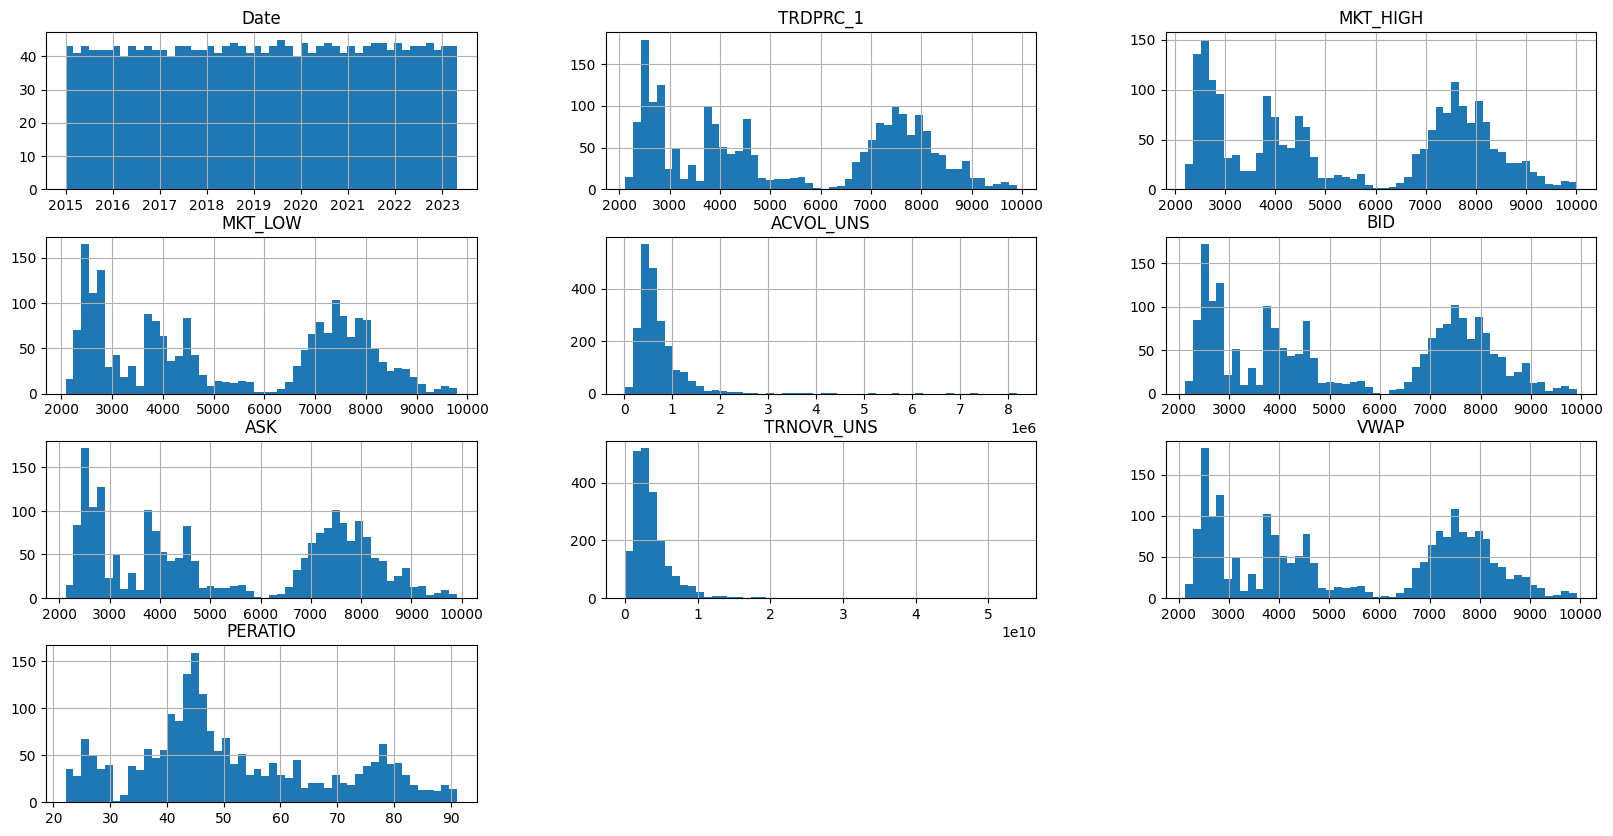

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
lseg_v1.hist(bins=50, figsize=(20,10))
plt.show()

In [ ]:
#setting the date as the index 
lseg_v1 = lseg_v1.set_index('Date')

In [ ]:
from datetime import timedelta

def plot_time_series(df, columns, title, ylabel, years=5):
    plt.figure(figsize=(15, 5))
    
    # Filter the DataFrame to include only the last 5 years
    last_date = df.index.max()
    start_date = last_date - pd.DateOffset(years=years)
    filtered_df = df.loc[start_date:last_date]
    
    for column in columns:
        plt.plot(filtered_df.index, filtered_df[column], label=column)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

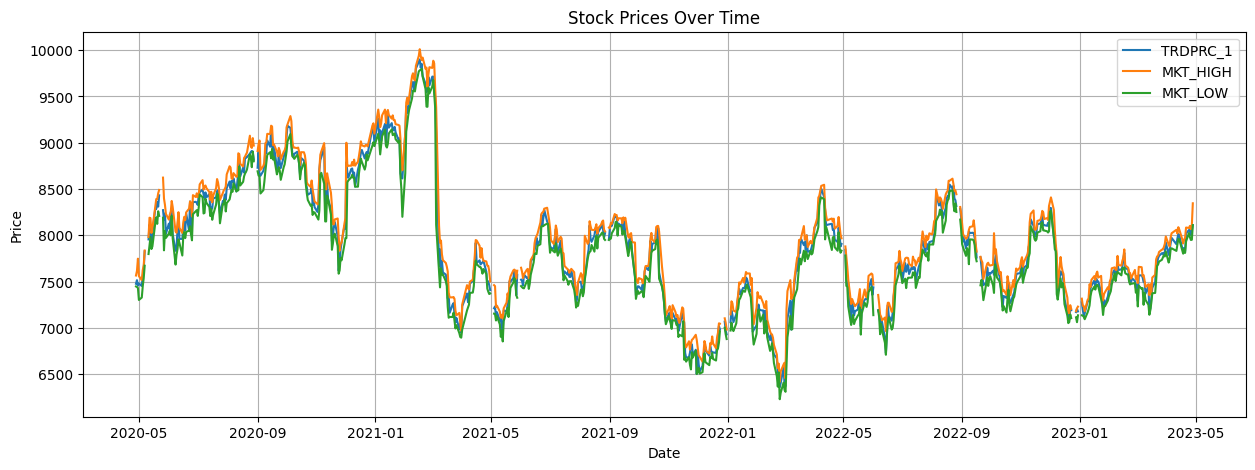

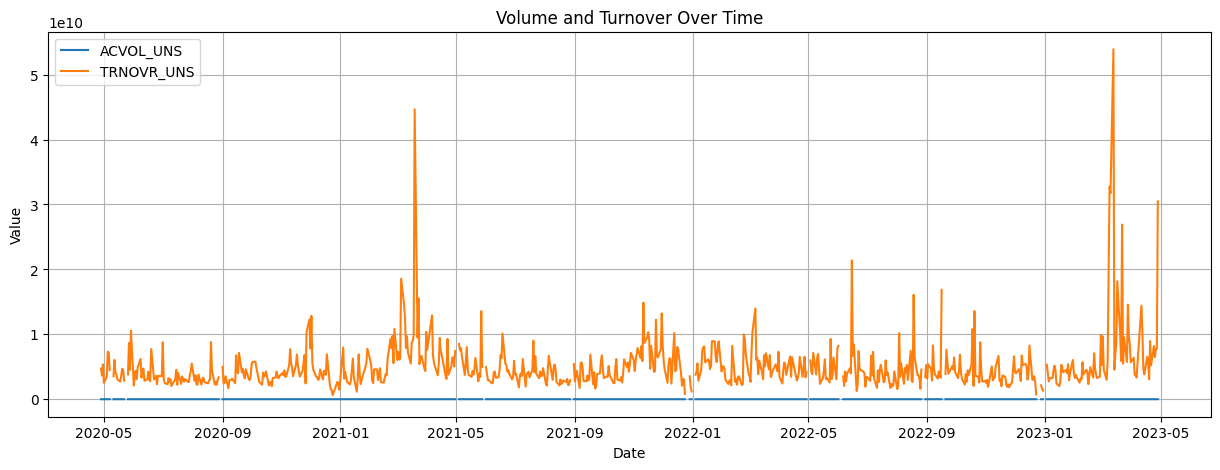

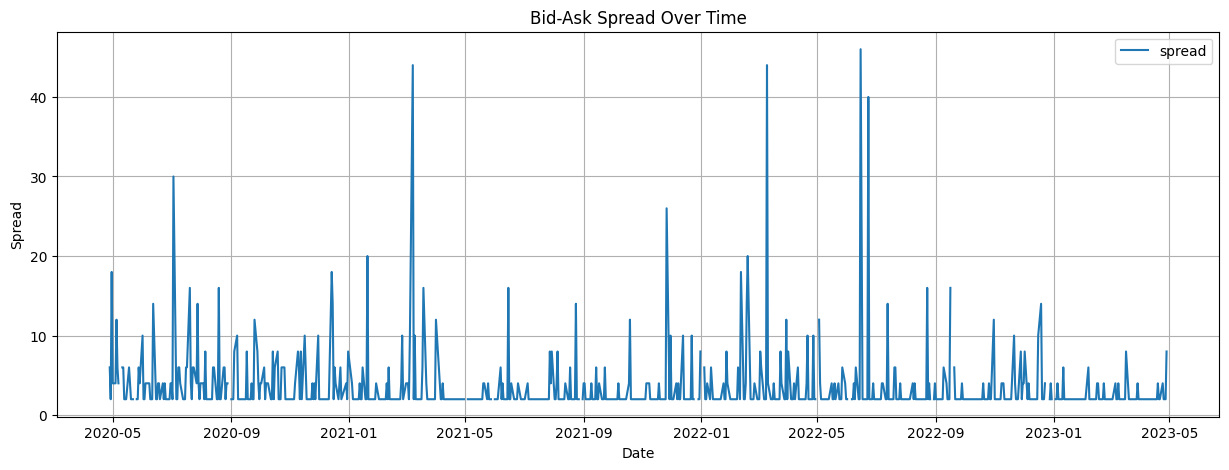

In [ ]:
# Stock prices over time
plot_time_series(lseg_v1, ['TRDPRC_1', 'MKT_HIGH', 'MKT_LOW'], 'Stock Prices Over Time', 'Price', years=3)

# Volume and Turnover over time
plot_time_series(lseg_v1, ['ACVOL_UNS', 'TRNOVR_UNS'], 'Volume and Turnover Over Time', 'Value', years=3)

# Bid-Ask spread over time
lseg_v1['spread'] = lseg_v1['ASK'] - lseg_v1['BID']
plot_time_series(lseg_v1, ['spread'], 'Bid-Ask Spread Over Time', 'Spread', years=3)

<ipython-input-119-454f2ad0756e>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



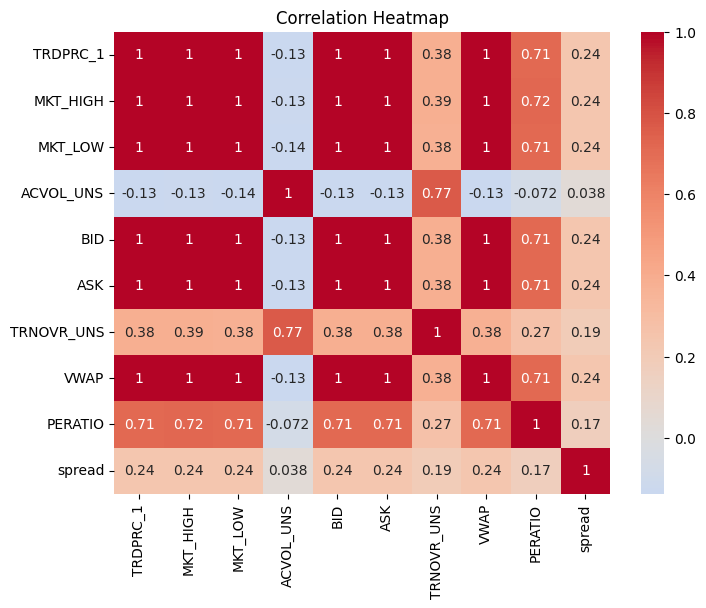

In [ ]:
#correlation btw the columns
plt.figure(figsize=(8, 6))
sns.heatmap(lseg_v1.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

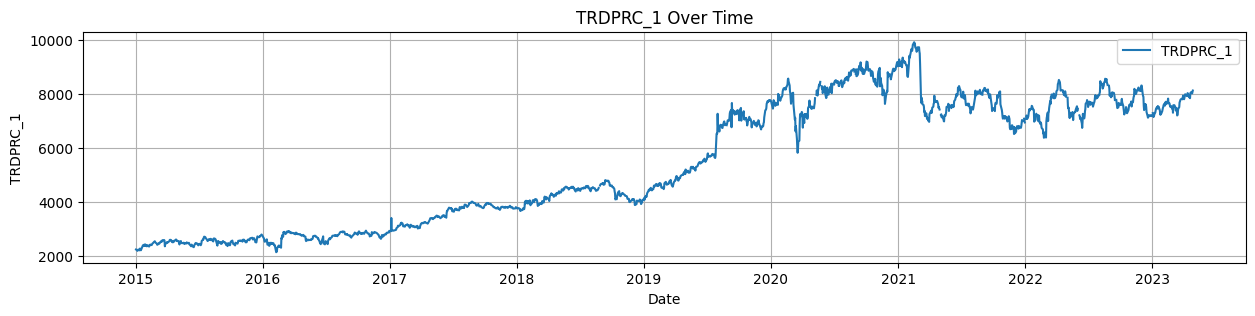

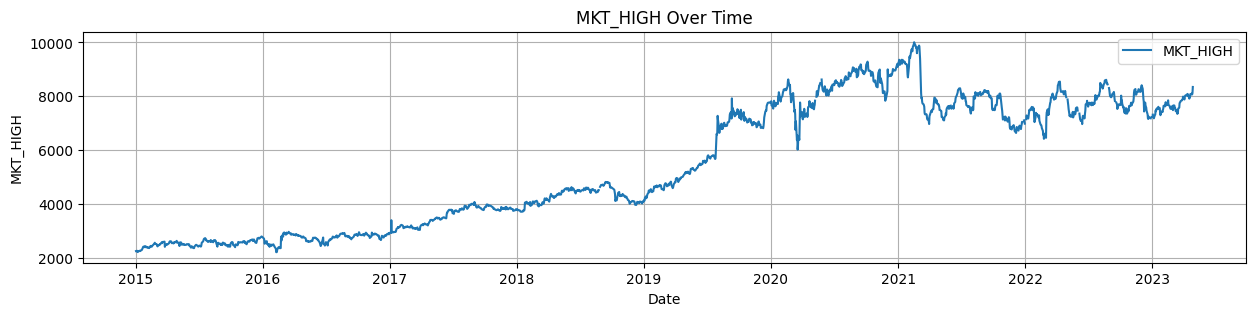

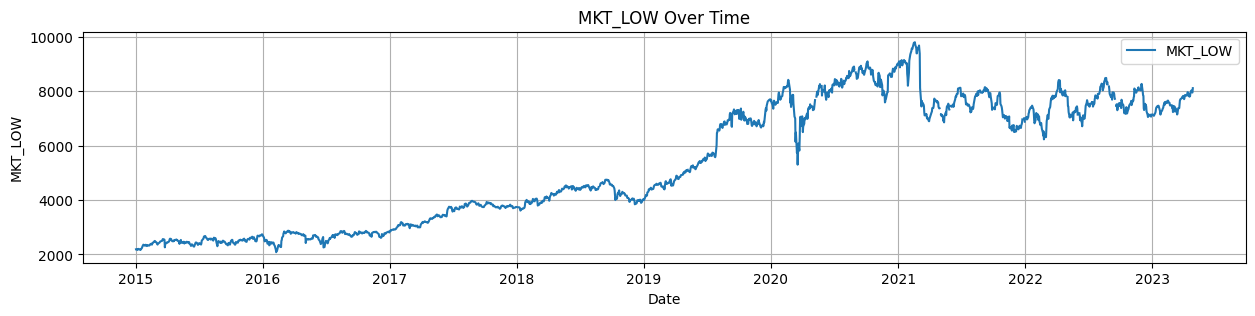

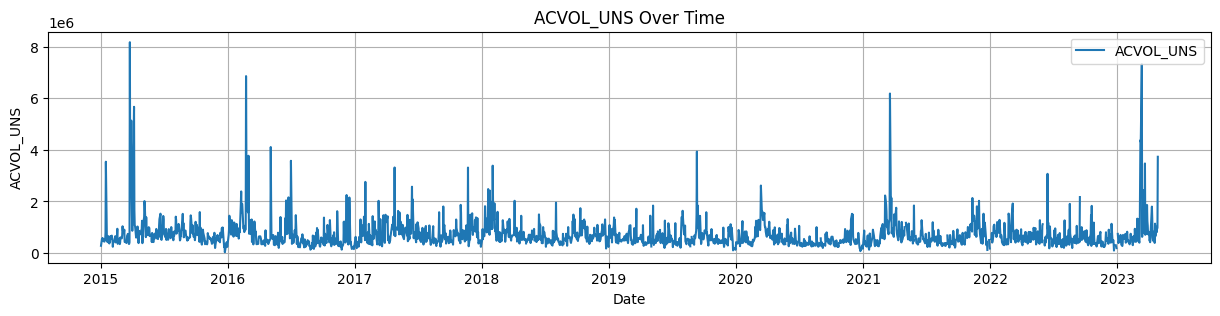

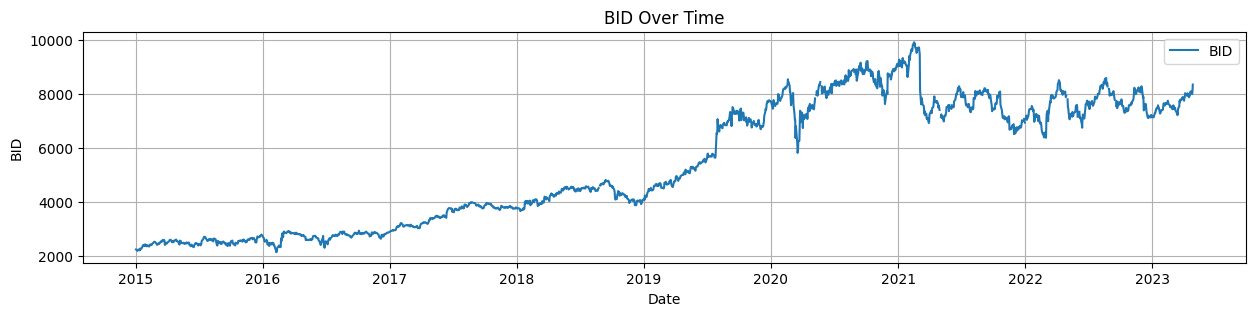

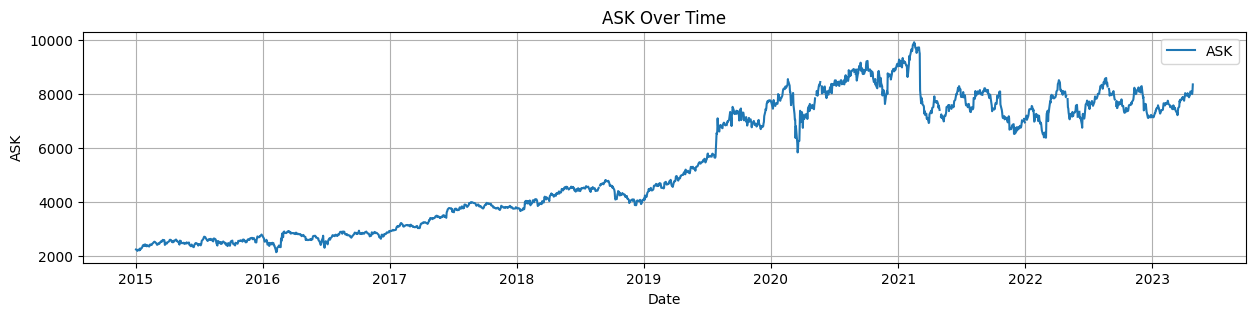

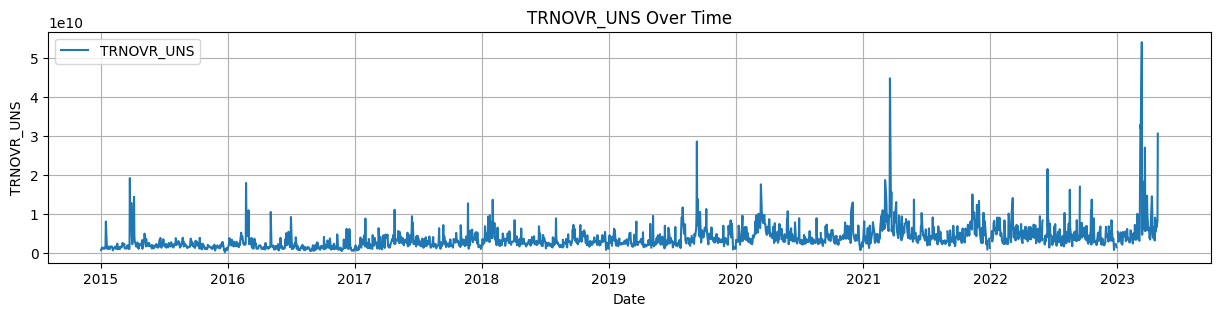

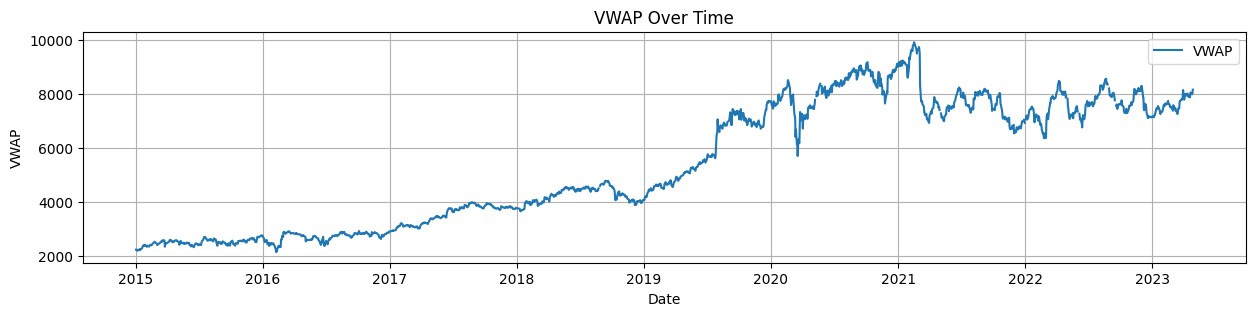

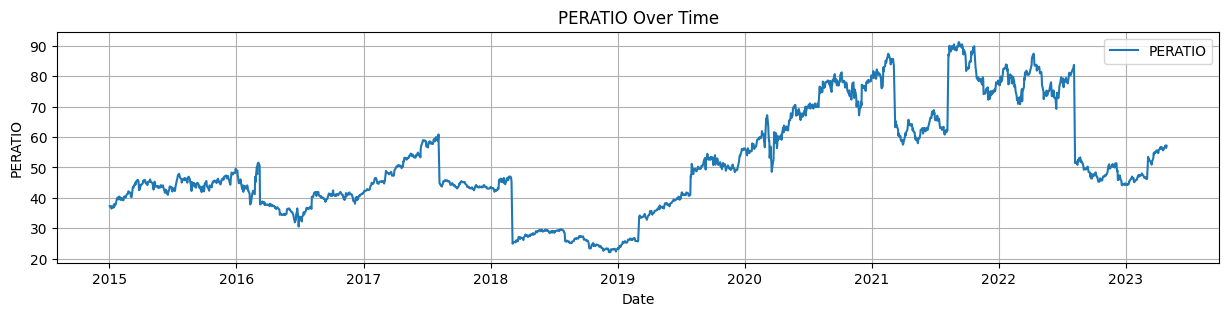

In [ ]:
def plot_individual_time_series(df, columns, figsize=(15, 3)):
    for column in columns:
        plt.figure(figsize=figsize)
        plt.plot(df.index, df[column], label=column)
        plt.title(f'{column} Over Time')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.grid(True)
        plt.show()

columns = ['TRDPRC_1', 'MKT_HIGH', 'MKT_LOW', 'ACVOL_UNS', 'BID', 'ASK', 'TRNOVR_UNS', 'VWAP', 'PERATIO']
plot_individual_time_series(lseg_v1, columns)

## data peers 

In [ ]:
data

,Date,TRDPRC_1,HIGH_1,LOW_1,ACVOL_UNS,OPEN_PRC,BID,ASK,TRNOVR_UNS,VWAP,BLKCOUNT,BLKVOLUM,NUM_MOVES,TRD_STATUS,SALTIM,NAVALUE,company
0,2015-01-02,140.59,142.080,139.09,186739.0,141.47,140.51,140.54,2.619566e+07,140.2785,1.0,12469.0,2575.0,212.0,NaN,NaN,FDS
1,2015-01-05,138.39,140.260,138.00,181030.0,139.87,138.38,138.39,2.512350e+07,138.7798,NaN,NaN,2858.0,212.0,NaN,NaN,FDS
2,2015-01-06,137.66,139.730,136.80,349865.0,139.03,137.59,137.63,4.825896e+07,137.8798,3.0,89711.0,3143.0,212.0,NaN,NaN,FDS
3,2015-01-07,138.76,139.690,137.71,230789.0,138.20,138.68,138.76,3.200681e+07,138.6850,1.0,15175.0,2541.0,212.0,NaN,NaN,FDS
4,2015-01-08,140.47,140.840,139.57,177214.0,139.60,140.45,140.47,2.487082e+07,140.3329,1.0,13827.0,2030.0,212.0,NaN,NaN,FDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,2023-04-25,306.45,316.550,305.34,1142111.0,306.75,306.42,306.61,3.536732e+08,309.7138,2.0,109014.0,31118.0,1.0,82800.0,NaN,MCO
12572,2023-04-26,304.92,308.800,303.95,989597.0,306.73,304.92,304.93,3.028885e+08,306.1026,2.0,180035.0,21795.0,1.0,82800.0,NaN,MCO
12573,2023-04-27,311.40,312.240,305.44,730101.0,308.24,311.40,311.53,2.263039e+08,309.9064,1.0,89392.0,17986.0,1.0,82800.0,NaN,MCO
12574,2023-04-28,313.12,313.420,309.02,578318.0,311.14,313.06,313.13,1.805866e+08,312.2315,1.0,114473.0,16296.0,1.0,82800.0,NaN,MCO


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date          datetime64[ns]
TRDPRC_1             float64
HIGH_1               float64
LOW_1                float64
ACVOL_UNS            float64
OPEN_PRC             float64
BID                  float64
ASK                  float64
TRNOVR_UNS           float64
VWAP                 float64
BLKCOUNT             float64
BLKVOLUM             float64
NUM_MOVES            float64
TRD_STATUS           float64
SALTIM               float64
NAVALUE              float64
company               object
dtype: object

In [ ]:
#setting the date as the index 
data = data.set_index('Date')

In [ ]:
companies = data['company'].unique()
companies

array(['FDS', 'VRSK.O', 'MSCI.K', 'SPGI.K', 'MORN.O', 'MCO'], dtype=object)

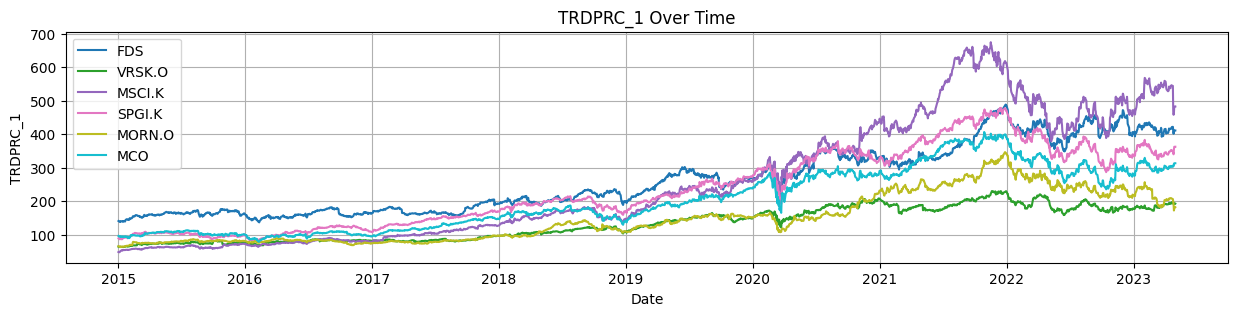

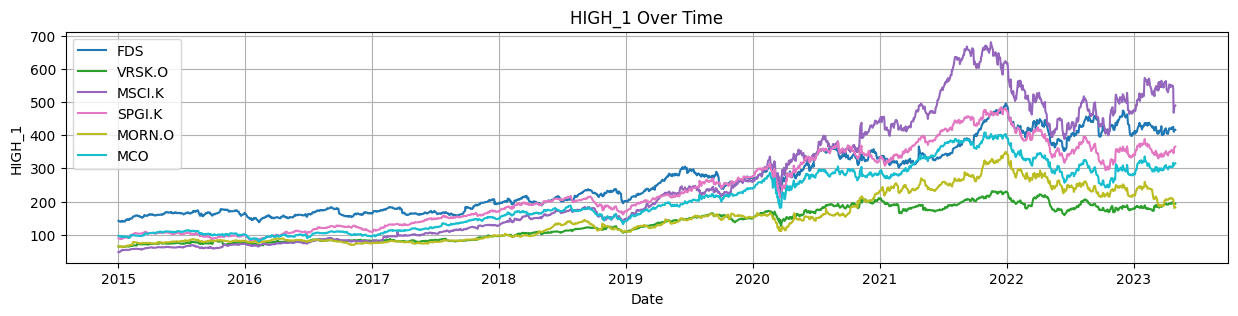

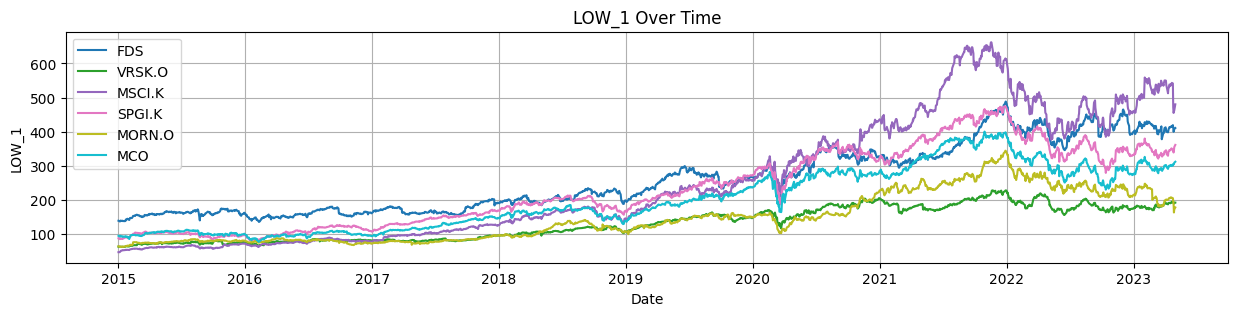

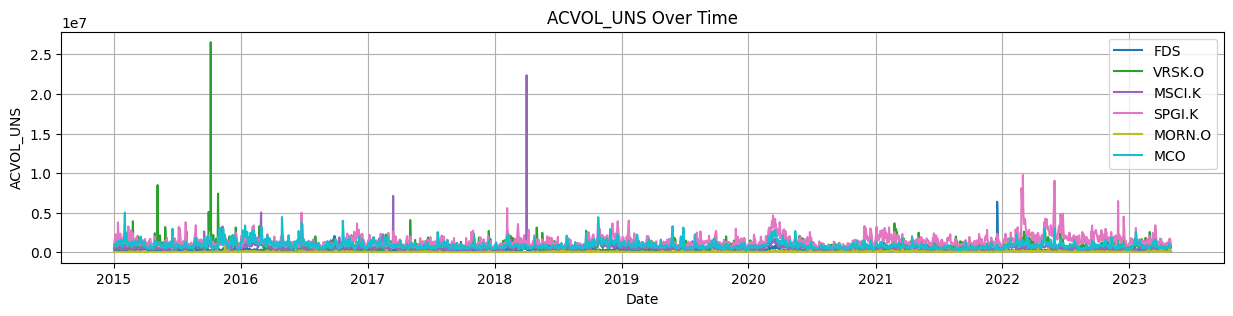

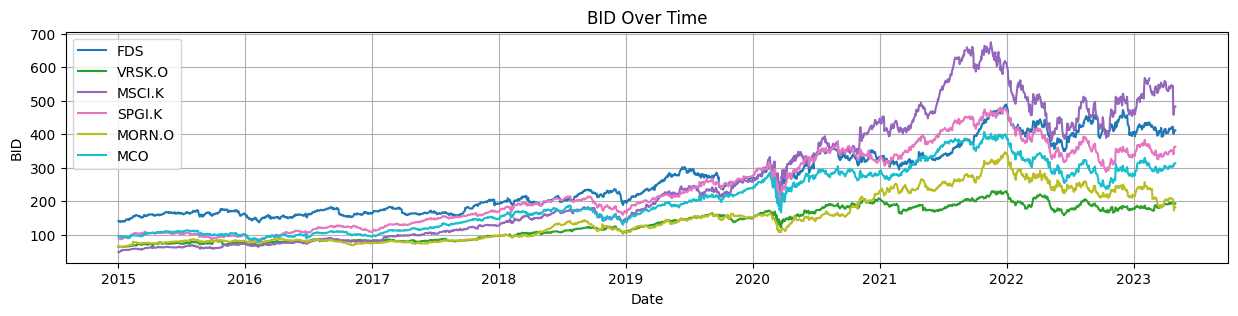

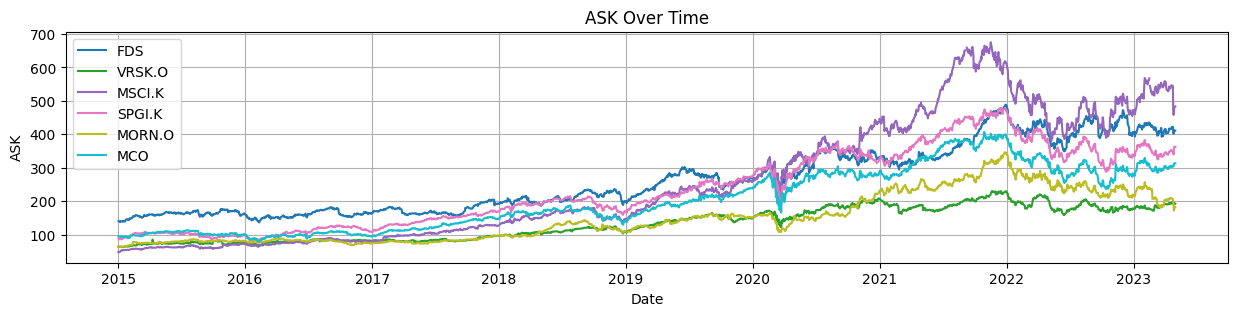

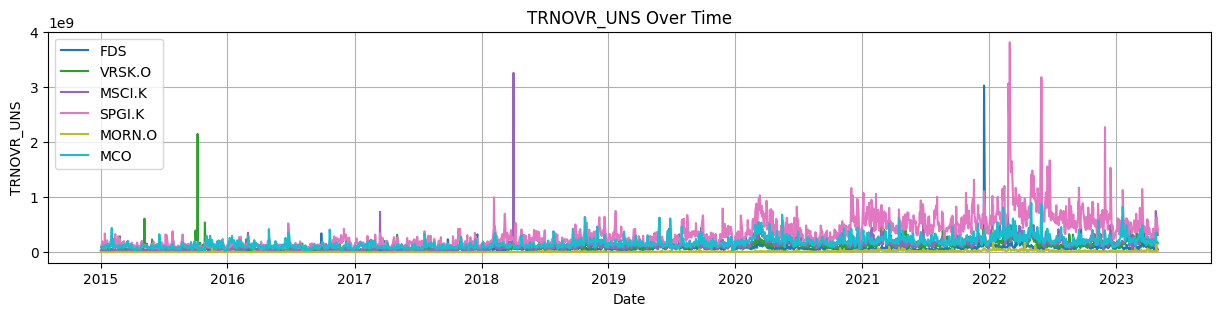

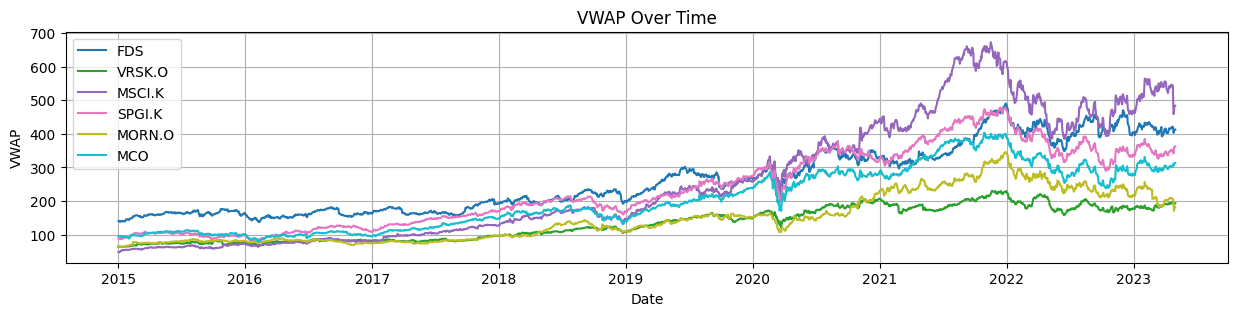

In [ ]:
def plot_individual_time_series(df, columns, companies, figsize=(15, 3)):
    colors = plt.cm.tab10(np.linspace(0, 1, len(companies)))
    color_dict = {company: color for company, color in zip(companies, colors)}

    for column in columns:
        plt.figure(figsize=figsize)
        for company in companies:
            company_df = df[df['company'] == company]
            plt.plot(company_df.index, company_df[column], label=company, color=color_dict[company])
        plt.title(f'{column} Over Time')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.grid(True)
        plt.show()

columns = ['TRDPRC_1', 'HIGH_1', 'LOW_1', 'ACVOL_UNS', 'BID', 'ASK', 'TRNOVR_UNS', 'VWAP']
companies = data['company'].unique()
plot_individual_time_series(data, columns, companies)

In [ ]:
# group DataFrame by company
data_v1 = data.groupby('company')

# call describe() method on grouped DataFrame
data_v1.describe()

TRDPRC_1                                                               \
           count        mean         std     min       25%      50%       75%   
company                                                                         
FDS       2096.0  262.761799   98.930816  136.40  167.7375  233.485  337.3200   
MCO       2096.0  203.874179   91.531759   78.45  111.1875  178.040  283.6425   
MORN.O    2096.0  148.900928   72.240169   62.73   82.0100  131.150  215.9775   
MSCI.K    2096.0  257.039404  180.709843   47.24   89.9225  184.190  419.3150   
SPGI.K    2095.0  236.950492  113.188512   80.77  126.3100  209.460  341.2350   
VRSK.O    2096.0  132.242531   48.633879   62.70   81.8575  125.960  178.0375   

                 HIGH_1              ...   SALTIM          NAVALUE           \
            max   count        mean  ...      75%      max   count mean std   
company                              ...                                      
FDS      488.85  2096.0  265.437641  ...  82800.0  84600.0     0.0  NaN NaN   
MCO      406.69  2096.0  205.944740  ...  82800.0  84600.0     0.0  NaN NaN   
MORN.O   346.61  2096.0  150.618035  ...  75600.0  76500.0     0.0  NaN NaN   
MSCI.K   675.15  2096.0  260.258647  ...  82800.0  84600.0     0.0  NaN NaN   
SPGI.K   478.97  2095.0  239.319790  ...  82800.0  84600.0     0.0  NaN NaN   
VRSK.O   230.03  2096.0  133.435817  ...  75600.0  76500.0     0.0  NaN NaN   

                             
        min 25% 50% 75% max  
company                      
FDS     NaN NaN NaN NaN NaN  
MCO     NaN NaN NaN NaN NaN  
MORN.O  NaN NaN NaN NaN NaN  
MSCI.K  NaN NaN NaN NaN NaN  
SPGI.K  NaN NaN NaN NaN NaN  
VRSK.O  NaN NaN NaN NaN NaN  

[6 rows x 120 columns]

## Exchange Peers 

In [ ]:
exchange

,Date,TRDPRC_1,HIGH_1,LOW_1,ACVOL_UNS,OPEN_PRC,BID,ASK,TRNOVR_UNS,VWAP,BLKCOUNT,BLKVOLUM,NUM_MOVES,TRD_STATUS,SALTIM,NAVALUE,company
0,2015-01-02,43.528,44.152,43.160,2868185.0,44.078,43.514,43.528,1.247291e+08,43.48576,1.0,171050.0,6058.0,212.0,NaN,NaN,ICE
1,2015-01-05,43.766,44.168,43.230,5274175.0,43.400,43.780,43.790,2.312898e+08,43.85376,3.0,401510.0,11403.0,212.0,NaN,NaN,ICE
2,2015-01-06,43.140,44.156,42.710,6892380.0,43.916,43.160,43.162,2.980259e+08,43.24292,3.0,1368725.0,13876.0,212.0,NaN,NaN,ICE
3,2015-01-07,43.750,43.790,42.762,14758775.0,43.294,43.762,43.772,6.416638e+08,43.47542,6.0,6382790.0,17416.0,212.0,NaN,NaN,ICE
4,2015-01-08,44.300,44.728,43.950,4231780.0,43.950,44.392,44.396,1.880822e+08,44.44892,3.0,425930.0,8884.0,212.0,NaN,NaN,ICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16747,2023-04-25,315.760,319.060,311.970,516792.0,318.130,315.920,316.070,1.627059e+08,314.81920,2.0,64335.0,15477.0,1.0,72000.0,NaN,MKTX.O
16748,2023-04-26,310.540,324.970,308.050,357471.0,324.970,310.540,310.920,1.114914e+08,311.92260,1.0,26754.0,14637.0,1.0,72000.0,NaN,MKTX.O
16749,2023-04-27,313.160,314.990,301.920,297699.0,312.200,313.160,313.240,9.282681e+07,311.78250,1.0,46646.0,11160.0,1.0,72000.0,NaN,MKTX.O
16750,2023-04-28,318.370,318.980,311.280,297400.0,312.990,318.210,318.410,9.431302e+07,317.09970,1.0,76042.0,9258.0,1.0,72000.0,NaN,MKTX.O


In [ ]:
#datatypes
exchange['Date'] = pd.to_datetime(exchange['Date'])
print(exchange.dtypes)

#setting the date as the index 
exchange = exchange.set_index('Date')

Date          datetime64[ns]
TRDPRC_1             float64
HIGH_1               float64
LOW_1                float64
ACVOL_UNS            float64
OPEN_PRC             float64
BID                  float64
ASK                  float64
TRNOVR_UNS           float64
VWAP                 float64
BLKCOUNT             float64
BLKVOLUM             float64
NUM_MOVES            float64
TRD_STATUS           float64
SALTIM               float64
NAVALUE              float64
company               object
dtype: object


In [ ]:
companies = exchange['company'].unique()
companies

array(['ICE', 'NDAQ.O', 'EEFT.O', 'CME.O', 'CBOE.K', '0388.HK',
       'DB1GnEUR.xbo', 'MKTX.O'], dtype=object)

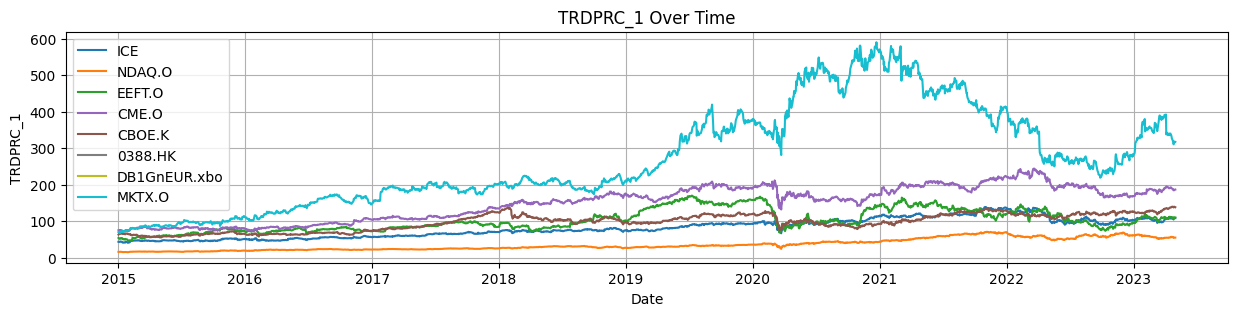

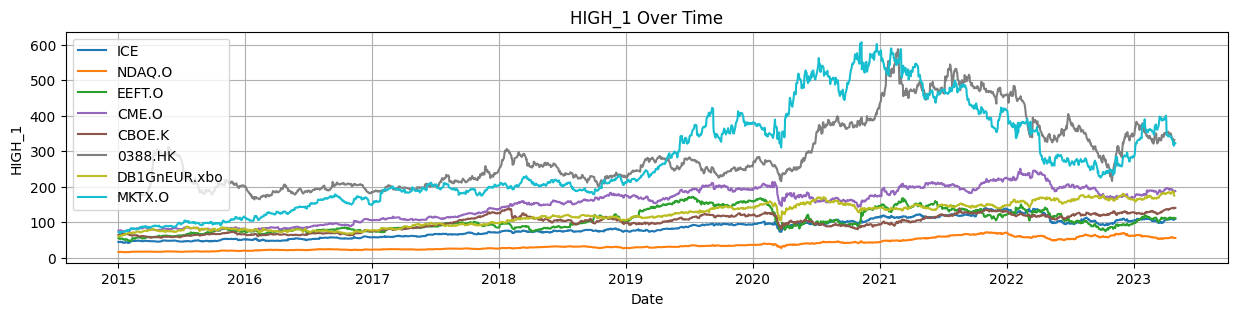

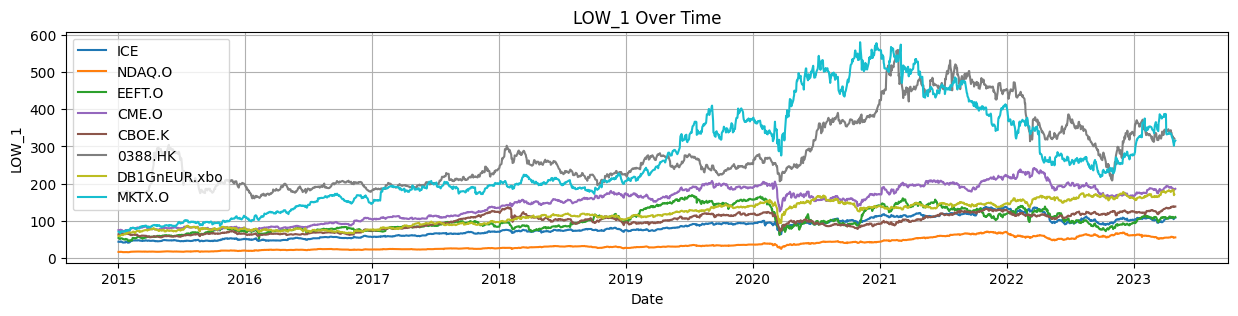

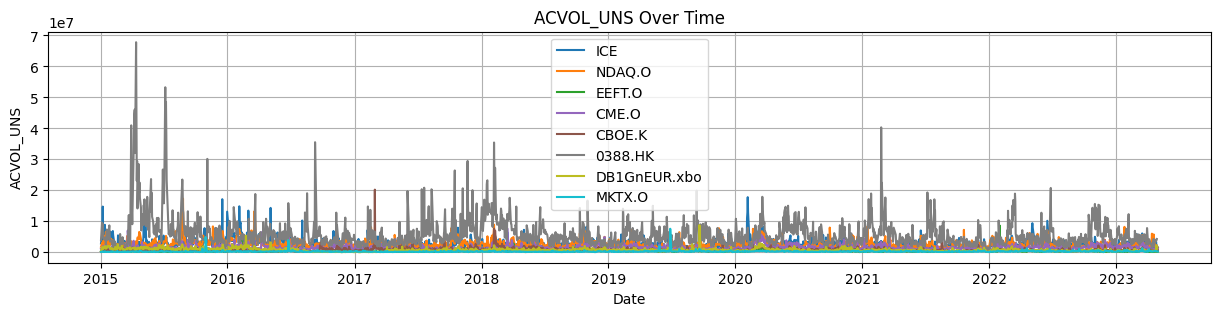

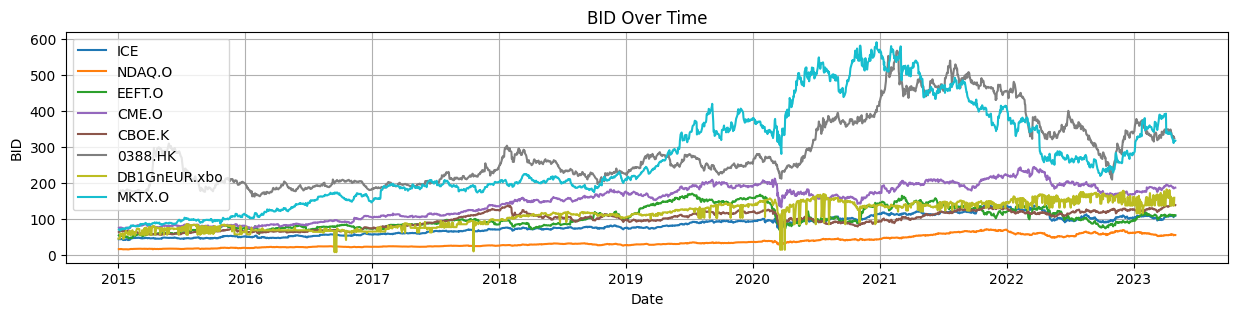

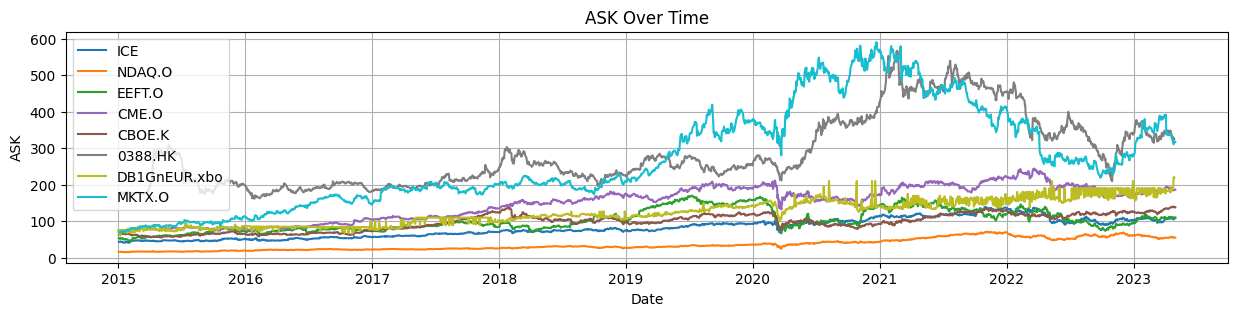

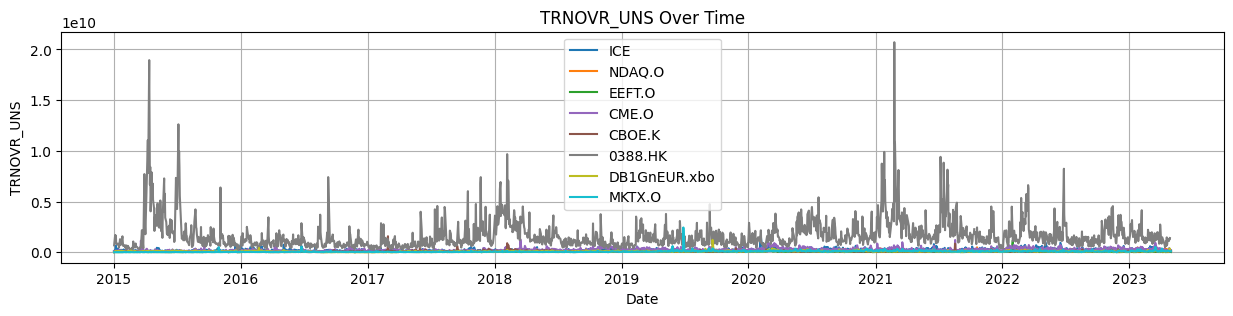

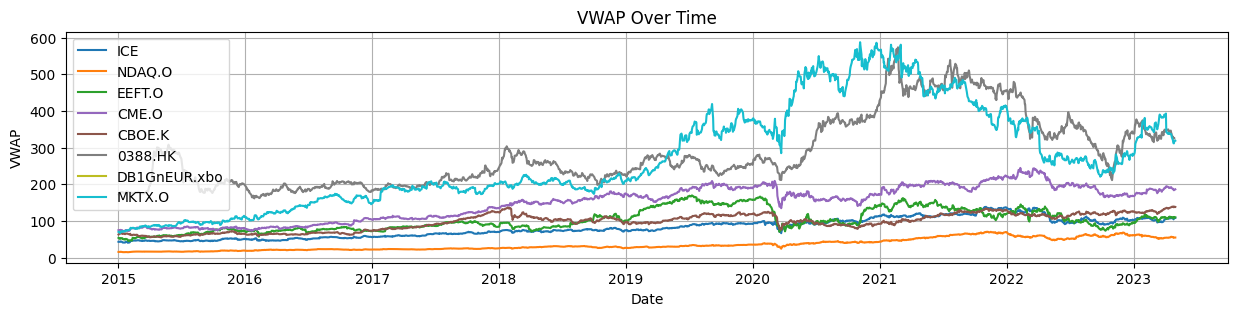

In [ ]:
def plot_individual_time_series(df, columns, companies, figsize=(15, 3)):
    colors = plt.cm.tab10(np.linspace(0, 1, len(companies)))
    color_dict = {company: color for company, color in zip(companies, colors)}

    for column in columns:
        plt.figure(figsize=figsize)
        for company in companies:
            company_df = df[df['company'] == company]
            plt.plot(company_df.index, company_df[column], label=company, color=color_dict[company])
        plt.title(f'{column} Over Time')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.grid(True)
        plt.show()

columns = ['TRDPRC_1', 'HIGH_1', 'LOW_1', 'ACVOL_UNS', 'BID', 'ASK', 'TRNOVR_UNS', 'VWAP']
companies = exchange['company'].unique()
plot_individual_time_series(exchange, columns, companies)

# Visuals / history 

In [ ]:
data['company_type'] = 'data_peer'
exchange['company_type'] = 'exchange_peer'

In [ ]:
peers_df = pd.concat([data, exchange])
peers_df

,TRDPRC_1,HIGH_1,LOW_1,ACVOL_UNS,OPEN_PRC,BID,ASK,TRNOVR_UNS,VWAP,BLKCOUNT,BLKVOLUM,NUM_MOVES,TRD_STATUS,SALTIM,NAVALUE,company,company_type
Date,,,,,,,,,,,,,,,,,
2015-01-02,140.59,142.08,139.09,186739.0,141.47,140.51,140.54,2.619566e+07,140.2785,1.0,12469.0,2575.0,212.0,NaN,NaN,FDS,data_peer
2015-01-05,138.39,140.26,138.00,181030.0,139.87,138.38,138.39,2.512350e+07,138.7798,NaN,NaN,2858.0,212.0,NaN,NaN,FDS,data_peer
2015-01-06,137.66,139.73,136.80,349865.0,139.03,137.59,137.63,4.825896e+07,137.8798,3.0,89711.0,3143.0,212.0,NaN,NaN,FDS,data_peer
2015-01-07,138.76,139.69,137.71,230789.0,138.20,138.68,138.76,3.200681e+07,138.6850,1.0,15175.0,2541.0,212.0,NaN,NaN,FDS,data_peer
2015-01-08,140.47,140.84,139.57,177214.0,139.60,140.45,140.47,2.487082e+07,140.3329,1.0,13827.0,2030.0,212.0,NaN,NaN,FDS,data_peer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25,315.76,319.06,311.97,516792.0,318.13,315.92,316.07,1.627059e+08,314.8192,2.0,64335.0,15477.0,1.0,72000.0,NaN,MKTX.O,exchange_peer
2023-04-26,310.54,324.97,308.05,357471.0,324.97,310.54,310.92,1.114914e+08,311.9226,1.0,26754.0,14637.0,1.0,72000.0,NaN,MKTX.O,exchange_peer
2023-04-27,313.16,314.99,301.92,297699.0,312.20,313.16,313.24,9.282681e+07,311.7825,1.0,46646.0,11160.0,1.0,72000.0,NaN,MKTX.O,exchange_peer


In [ ]:
lseg['company_type'] = 'main'

In [ ]:
peers_df.shape

(29328, 17)

In [ ]:
peers_df.columns

Index(['TRDPRC_1', 'HIGH_1', 'LOW_1', 'ACVOL_UNS', 'OPEN_PRC', 'BID', 'ASK',
       'TRNOVR_UNS', 'VWAP', 'BLKCOUNT', 'BLKVOLUM', 'NUM_MOVES', 'TRD_STATUS',
       'SALTIM', 'NAVALUE', 'company', 'company_type'],
      dtype='object')

In [ ]:
lseg.columns

Index(['Date', 'TRDPRC_1', 'MKT_HIGH', 'MKT_LOW', 'ACVOL_UNS', 'MKT_OPEN',
       'BID', 'ASK', 'TRNOVR_UNS', 'VWAP', 'MID_PRICE', 'PERATIO', 'ORDBK_VOL',
       'NUM_MOVES', 'IND_AUCVOL', 'OFFBK_VOL', 'HIGH_1', 'ORDBK_VWAP',
       'IND_AUC', 'OPEN_PRC', 'LOW_1', 'OFF_CLOSE', 'CLS_AUCVOL', 'OPN_AUCVOL',
       'OPN_AUC', 'CLS_AUC', 'TRD_STATUS', 'INT_AUC', 'INT_AUCVOL',
       'EX_VOL_UNS', 'ALL_C_MOVE', 'ELG_NUMMOV', 'NAVALUE', 'company',
       'company_type'],
      dtype='object')

In [ ]:
peers_df = peers_df.reset_index()

In [ ]:
# rember i took out 'BLKCOUNT', 'BLKVOLUM', 'SALTIM'
lseg = lseg.loc[:, ['Date', 'TRDPRC_1', 'HIGH_1', 'LOW_1', 'ACVOL_UNS', 'OPEN_PRC',
                           'BID', 'ASK', 'TRNOVR_UNS', 'VWAP', 
                           'NUM_MOVES', 'TRD_STATUS', 'NAVALUE', 'company',
                           'company_type']]

peers = peers_df.loc[:, ['Date', 'TRDPRC_1', 'HIGH_1', 'LOW_1', 'ACVOL_UNS', 'OPEN_PRC',
                           'BID', 'ASK', 'TRNOVR_UNS', 'VWAP', 
                           'NUM_MOVES', 'TRD_STATUS', 'NAVALUE', 'company',
                           'company_type']]                  

In [ ]:
print(lseg.shape)
print(peers.shape)

(2125, 15)
(29328, 15)


In [ ]:
history = pd.concat([lseg, peers])
history

,Date,TRDPRC_1,HIGH_1,LOW_1,ACVOL_UNS,OPEN_PRC,BID,ASK,TRNOVR_UNS,VWAP,NUM_MOVES,TRD_STATUS,NAVALUE,company,company_type
0,2015-01-02,2224.00,2243.00,2191.00,278969.0,2243.00,2224.00,2225.00,6.200290e+08,2222.5720,1376.0,NaN,NaN,LSEG.L,main
1,2015-01-05,2204.00,2254.00,2199.00,560234.0,2212.00,2204.00,2205.00,1.244430e+09,2221.2680,2476.0,NaN,NaN,LSEG.L,main
2,2015-01-06,2174.00,2208.00,2166.00,474107.0,2204.00,2173.00,2174.00,1.035420e+09,2183.9370,2401.0,NaN,NaN,LSEG.L,main
3,2015-01-07,2190.00,2207.00,2176.00,571133.0,2183.00,2189.00,2190.00,1.252315e+09,2192.6850,2658.0,NaN,NaN,LSEG.L,main
4,2015-01-08,2216.00,2222.00,2202.00,548731.0,2210.00,2215.00,2216.00,1.215376e+09,2214.8850,2031.0,NaN,NaN,LSEG.L,main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29323,2023-04-25 00:00:00,315.76,319.06,311.97,516792.0,318.13,315.92,316.07,1.627059e+08,314.8192,15477.0,1.0,NaN,MKTX.O,exchange_peer
29324,2023-04-26 00:00:00,310.54,324.97,308.05,357471.0,324.97,310.54,310.92,1.114914e+08,311.9226,14637.0,1.0,NaN,MKTX.O,exchange_peer
29325,2023-04-27 00:00:00,313.16,314.99,301.92,297699.0,312.20,313.16,313.24,9.282681e+07,311.7825,11160.0,1.0,NaN,MKTX.O,exchange_peer
29326,2023-04-28 00:00:00,318.37,318.98,311.28,297400.0,312.99,318.21,318.41,9.431302e+07,317.0997,9258.0,1.0,NaN,MKTX.O,exchange_peer


In [ ]:
#datatypes
history['Date'] = pd.to_datetime(history['Date'])
print(history.dtypes)

#setting the date as the index 
history = history.set_index('Date')

In [ ]:
# calculate percentage of NaN values in each column
nan_percent = history.isna().mean() * 100
print(nan_percent)

TRDPRC_1         13.350078
HIGH_1            0.130353
LOW_1             0.130353
ACVOL_UNS         0.123995
OPEN_PRC          0.127174
BID               0.098560
ASK               0.098560
TRNOVR_UNS        0.127174
VWAP              6.835596
NUM_MOVES         3.618097
TRD_STATUS       19.190538
NAVALUE         100.000000
company           0.000000
company_type      0.000000
dtype: float64


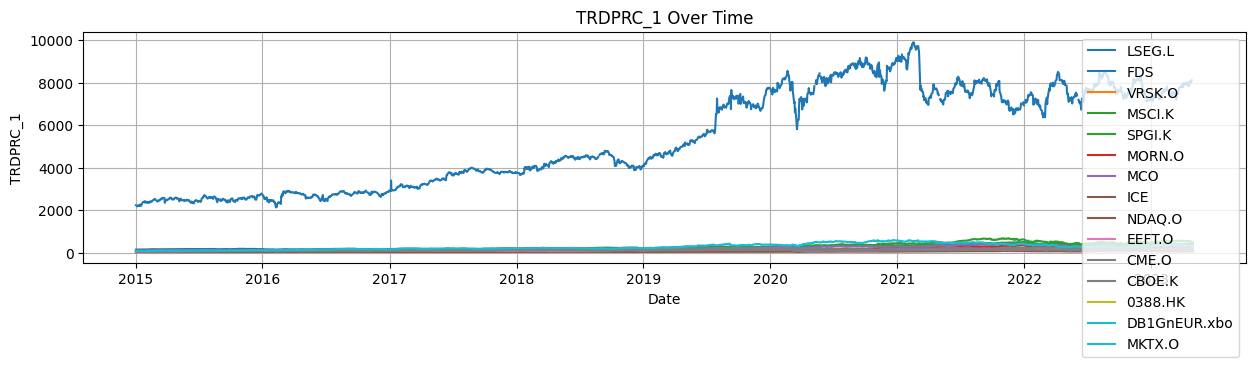

In [ ]:
def plot_individual_time_series(df, columns, companies, figsize=(15, 3)):
    colors = plt.cm.tab10(np.linspace(0, 1, len(companies)))
    color_dict = {company: color for company, color in zip(companies, colors)}

    for column in columns:
        plt.figure(figsize=figsize)
        for company in companies:
            company_df = df[df['company'] == company]
            plt.plot(company_df.index, company_df[column], label=company, color=color_dict[company])
        plt.title(f'{column} Over Time')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.grid(True)
        plt.show()


columns = ['TRDPRC_1']
companies = history['company'].unique()
plot_individual_time_series(history, columns, companies)

In [ ]:
grouped_type = history.groupby('company_type').mean()
grouped_type

<ipython-input-147-93ec3af7bd39>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,TRDPRC_1,HIGH_1,LOW_1,ACVOL_UNS,OPEN_PRC,BID,ASK,TRNOVR_UNS,VWAP,NUM_MOVES,TRD_STATUS,NAVALUE
company_type,,,,,,,,,,,,
data_peer,206.959171,209.166714,204.615107,6.915994e+05,206.880163,206.808127,206.911654,1.414685e+08,206.945445,10115.509583,95.128739,NaN
exchange_peer,123.377710,144.104327,140.695825,1.914259e+06,142.429653,141.559238,143.181815,3.140929e+08,145.910977,12354.568076,48.465357,NaN
main,5394.421774,5452.709938,5332.382786,7.105014e+05,5394.295768,5391.750357,5394.650499,3.668451e+09,5392.335318,4279.430338,1.870849,NaN


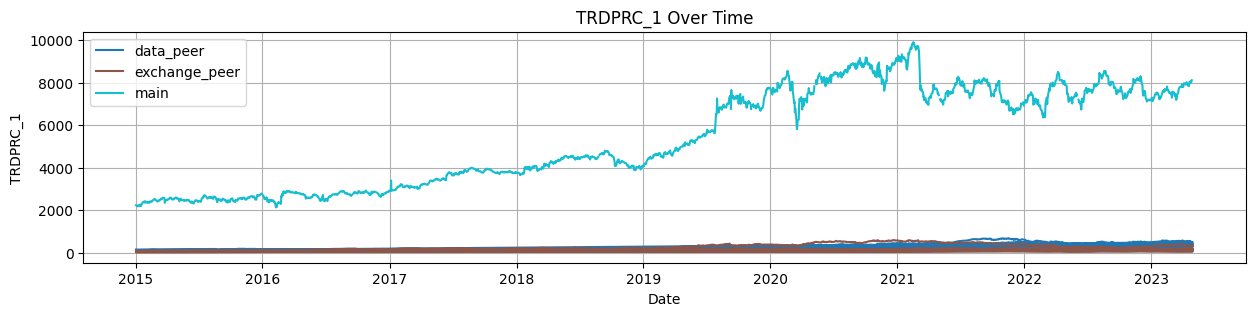

In [ ]:
def plot_individual_time_series_grouped(df_grouped, columns, companies, figsize=(15, 3)):
    colors = plt.cm.tab10(np.linspace(0, 1, len(companies)))
    color_dict = {company: color for company, color in zip(companies, colors)}

    for column in columns:
        plt.figure(figsize=figsize)
        for company in companies:
            company_df = df_grouped.get_group(company)
            plt.plot(company_df.index, company_df[column], label=company, color=color_dict[company])
        plt.title(f'{column} Over Time')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.grid(True)
        plt.show()

grouped_type = history.groupby('company_type')
columns = ['TRDPRC_1']
companies = grouped_type.groups.keys()
plot_individual_time_series_grouped(grouped_type, columns, companies)


## Clustering 

In [ ]:
history

,TRDPRC_1,HIGH_1,LOW_1,ACVOL_UNS,OPEN_PRC,BID,ASK,TRNOVR_UNS,VWAP,NUM_MOVES,TRD_STATUS,NAVALUE,company,company_type
Date,,,,,,,,,,,,,,
2015-01-02,2224.00,2243.00,2191.00,278969.0,2243.00,2224.00,2225.00,6.200290e+08,2222.5720,1376.0,NaN,NaN,LSEG.L,main
2015-01-05,2204.00,2254.00,2199.00,560234.0,2212.00,2204.00,2205.00,1.244430e+09,2221.2680,2476.0,NaN,NaN,LSEG.L,main
2015-01-06,2174.00,2208.00,2166.00,474107.0,2204.00,2173.00,2174.00,1.035420e+09,2183.9370,2401.0,NaN,NaN,LSEG.L,main
2015-01-07,2190.00,2207.00,2176.00,571133.0,2183.00,2189.00,2190.00,1.252315e+09,2192.6850,2658.0,NaN,NaN,LSEG.L,main
2015-01-08,2216.00,2222.00,2202.00,548731.0,2210.00,2215.00,2216.00,1.215376e+09,2214.8850,2031.0,NaN,NaN,LSEG.L,main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25,315.76,319.06,311.97,516792.0,318.13,315.92,316.07,1.627059e+08,314.8192,15477.0,1.0,NaN,MKTX.O,exchange_peer
2023-04-26,310.54,324.97,308.05,357471.0,324.97,310.54,310.92,1.114914e+08,311.9226,14637.0,1.0,NaN,MKTX.O,exchange_peer
2023-04-27,313.16,314.99,301.92,297699.0,312.20,313.16,313.24,9.282681e+07,311.7825,11160.0,1.0,NaN,MKTX.O,exchange_peer


In [ ]:
df = history

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px


# Extract the numerical columns
numerical_columns = ['TRDPRC_1', 'HIGH_1', 'LOW_1', 'ACVOL_UNS', 'OPEN_PRC', 'BID', 'ASK', 'TRNOVR_UNS', 'VWAP', 'NUM_MOVES', 'TRD_STATUS']

# Group the data by company and compute the mean for each column
grouped_df = df.groupby('company')[numerical_columns].mean()

# Fill any NaN values with the column mean
grouped_df = grouped_df.fillna(grouped_df.mean())

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_df)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the DataFrame
grouped_df['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Visualize the clusters using a scatter plot
fig = px.scatter(x=pca_data[:,0], y=pca_data[:,1], color=cluster_labels, text=grouped_df.index, title='K-means Clustering of Companies')

# Adjust the position of the labels
fig.update_traces(textposition='top center')

# Set the x and y axis labels
fig.update_xaxes(title_text='PCA1')
fig.update_yaxes(title_text='PCA2')

fig.show()

In [ ]:
import plotly.graph_objects as go

# Add the cluster labels and company type to the DataFrame
grouped_df['Cluster'] = cluster_labels
grouped_df['Company Type'] = df.groupby('company')['company_type'].first().values

In [ ]:
grouped_df

,TRDPRC_1,HIGH_1,LOW_1,ACVOL_UNS,OPEN_PRC,BID,ASK,TRNOVR_UNS,VWAP,NUM_MOVES,TRD_STATUS,Cluster,Company Type
company,,,,,,,,,,,,,
0388.HK,567.419798,287.764666,280.967789,5.963737e+06,284.463494,284.180673,284.414153,1.679010e+09,284.313278,12721.479495,48.091707,2,exchange_peer
CBOE.K,97.494132,98.600240,96.356349,7.843591e+05,97.489237,97.459160,97.517171,7.681220e+07,97.491421,10082.800095,1.000000,0,exchange_peer
CME.O,150.077894,151.544573,148.532813,1.603115e+06,150.077732,150.055592,150.098154,2.571797e+08,150.052717,20070.469943,28.628136,2,exchange_peer
DB1GnEUR.xbo,567.419798,119.195874,116.868296,7.831101e+05,118.057664,111.773341,123.924216,8.907074e+07,547.035902,8419.370616,62.032632,0,exchange_peer
EEFT.O,102.493254,103.871048,101.026609,4.262136e+05,102.487394,102.475642,102.554535,4.390666e+07,102.474443,5978.635496,31.120096,0,exchange_peer
FDS,262.761799,265.437641,259.928423,2.938216e+05,262.656844,262.758711,262.860301,7.484447e+07,262.755472,5707.372137,129.115992,0,data_peer
ICE,81.914167,82.657983,81.147365,2.924284e+06,81.917162,81.918751,81.944902,2.304695e+08,81.911362,22442.744275,124.822042,2,exchange_peer
LSEG.L,5394.421774,5452.709938,5332.382786,7.105014e+05,5394.295768,5391.750357,5394.650499,3.668451e+09,5392.335318,4279.430338,1.870849,1,main
MCO,203.874179,205.944740,201.689649,8.965010e+05,203.814413,203.763757,203.822998,1.707117e+08,203.864462,12808.320611,129.115992,0,data_peer


In [ ]:
desired_columns = ['Cluster', 'Company Type','TRDPRC_1']
selected_df = grouped_df.loc[:, desired_columns]
selected_df

# NB  the fact that lseg is in its own cluster (0-1-2)
#heterogeneity in valuation so make sense that the clustering picked up different division

#NB == !!!!For data provider peers, the P/E ratios range from 30.20 (MCO) to 391.34 (EEFT.O). !!!
# maybe take a look at EPS

,Cluster,Company Type,TRDPRC_1
company,,,
0388.HK,2,exchange_peer,567.419798
CBOE.K,0,exchange_peer,97.494132
CME.O,2,exchange_peer,150.077894
DB1GnEUR.xbo,0,exchange_peer,567.419798
EEFT.O,0,exchange_peer,102.493254
FDS,0,data_peer,262.761799
ICE,2,exchange_peer,81.914167
LSEG.L,1,main,5394.421774
MCO,0,data_peer,203.874179


- The stock prices for data provider peers range from 132.24 (VRSK.O) to 262.76 (FDS). The stock prices for this group are relatively close, with the exception of LSEG.L, which has a significantly higher stock price of 5394.42. This could indicate that LSEG.L is a much larger company with a higher market capitalization compared to its peers.

- The stock prices for exchange/financial market infrastructure peers range from 35.89 (NDAQ.O) to 567.41 (0388.HK and DB1GnEUR.xbo). The prices in this group have a wider range, which may indicate a greater degree of heterogeneity in factors like market capitalization and business models among these companies.

which is lowkey the opposite of what we see from the financials ( P/E ratio) 
